In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-challenge/sample_submission.csv
/kaggle/input/house-price-prediction-challenge/train.csv
/kaggle/input/house-price-prediction-challenge/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/house-price-prediction-challenge/train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [5]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [6]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

From the above data type description and by observing the head of the data frame, we can classify the given data as: <br>
1.) Numerical Features:<br>
     a.) BHK_NO.<br>
     b.) SQUARE_FT<br>
     c.) LONGITUDE<br>
     d.) LATITUDE<br>
     e.) TARGET(PRICE_IN_LACS)<br><br>
2.) Categorical Features:<br>
     a.) UNDER_CONSTRUCTION<br>
     b.) RERA<br>
     c.) BHK_OR_RK<br>
     d.) READY_TO_MOVE<br>
     e.) RESALE<br>

In [7]:
numerical_features = ['TARGET(PRICE_IN_LACS)','LATITUDE','LONGITUDE','SQUARE_FT','BHK_NO.']
categorical_features = ['UNDER_CONSTRUCTION','RERA','BHK_OR_RK','READY_TO_MOVE','RESALE']

**Statstics for Numerical Features:**

In [8]:
from scipy import stats
for col in numerical_features:
        print('The statstics for',col,'is: ')
        print(df[col].describe())
        print("Trim Mean is:",stats.trim_mean(df[col],0.2))

The statstics for TARGET(PRICE_IN_LACS) is: 
count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64
Trim Mean is: 66.24399637824683
The statstics for LATITUDE is: 
count    29451.000000
mean        76.837695
std         10.557747
min       -121.761248
25%         73.798100
50%         77.324137
75%         77.828740
max        152.962676
Name: LATITUDE, dtype: float64
Trim Mean is: 76.56709761946013
The statstics for LONGITUDE is: 
count    29451.000000
mean        21.300255
std          6.205306
min        -37.713008
25%         18.452663
50%         20.750000
75%         26.900926
max         59.912884
Name: LONGITUDE, dtype: float64
Trim Mean is: 21.373760921569236
The statstics for SQUARE_FT is: 
count    2.945100e+04
mean     1.980217e+04
std      1.901335e+06
min      3.000000e+00
25%      9.000211e+02
50%      1.1750

For BHK_no. we see mean to be 2.3 and median to be 2, so we can raw conclusion that central tendency for the feature is 2. (discrete)
If we observe for square ft area, the value of mean is 1.980217e+04 and the value od median is 1.175057e+03. The value of trimmed mean is 1196.8651459922414. Therefore, we can deduce that the value of central tendency for the feature should be between 1175.057 and 1196.865 m^2. (continous)
The central tendency for longitude is around 21 and for latitude is 76-77. (Continous) We can expect outliers in both the features, as we observe very high max and very low minimas.
For the target price, we see there is a large dufference between the mean and median. And very less difference between trimmed mean and median. Therefore we could assume the central tendency of the taregt price to be between 62-65 lacs.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

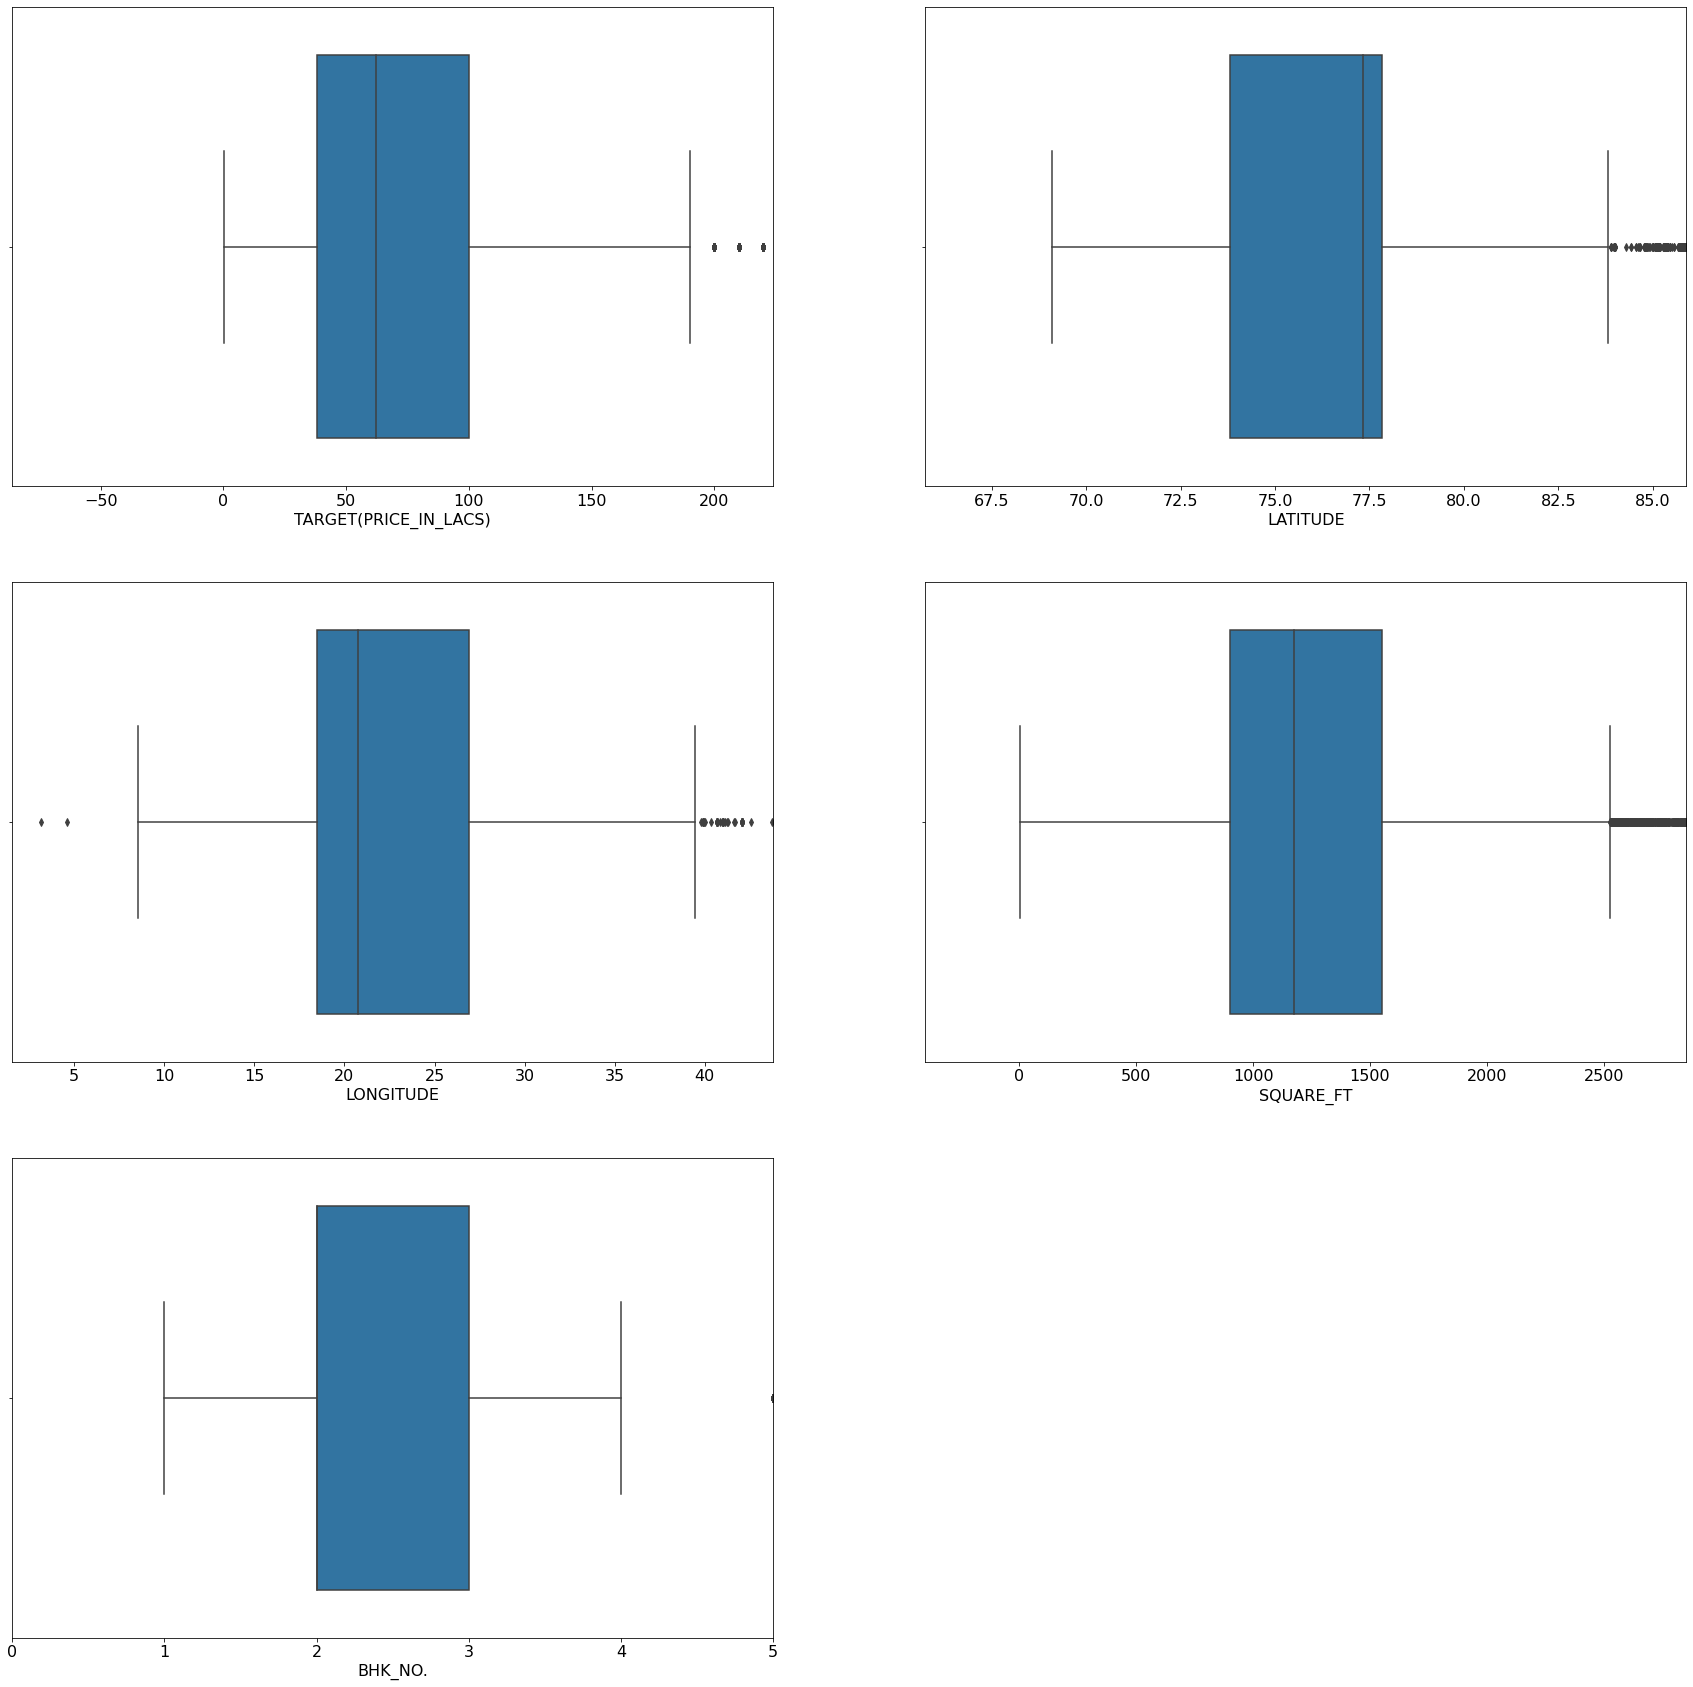

In [9]:
plt.figure(figsize=(30,30))
i = 1
plt.rcParams['font.size'] = 16
for col in numerical_features:
    plt.subplot(3,2,i)
    i = i + 1
    ax = sns.boxplot(df[col])
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    ax.set_xlim([df[col].quantile(0.25)-2*IQR,df[col].quantile(0.75)+2*IQR])

In [10]:
binned = pd.cut(df['TARGET(PRICE_IN_LACS)'],10)
binned.value_counts()

(-29.75, 3000.225]       29300
(6000.2, 9000.175]          74
(9000.175, 12000.15]        58
(3000.225, 6000.2]          16
(27000.025, 30000.0]         2
(24000.05, 27000.025]        1
(12000.15, 15000.125]        0
(15000.125, 18000.1]         0
(18000.1, 21000.075]         0
(21000.075, 24000.05]        0
Name: TARGET(PRICE_IN_LACS), dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

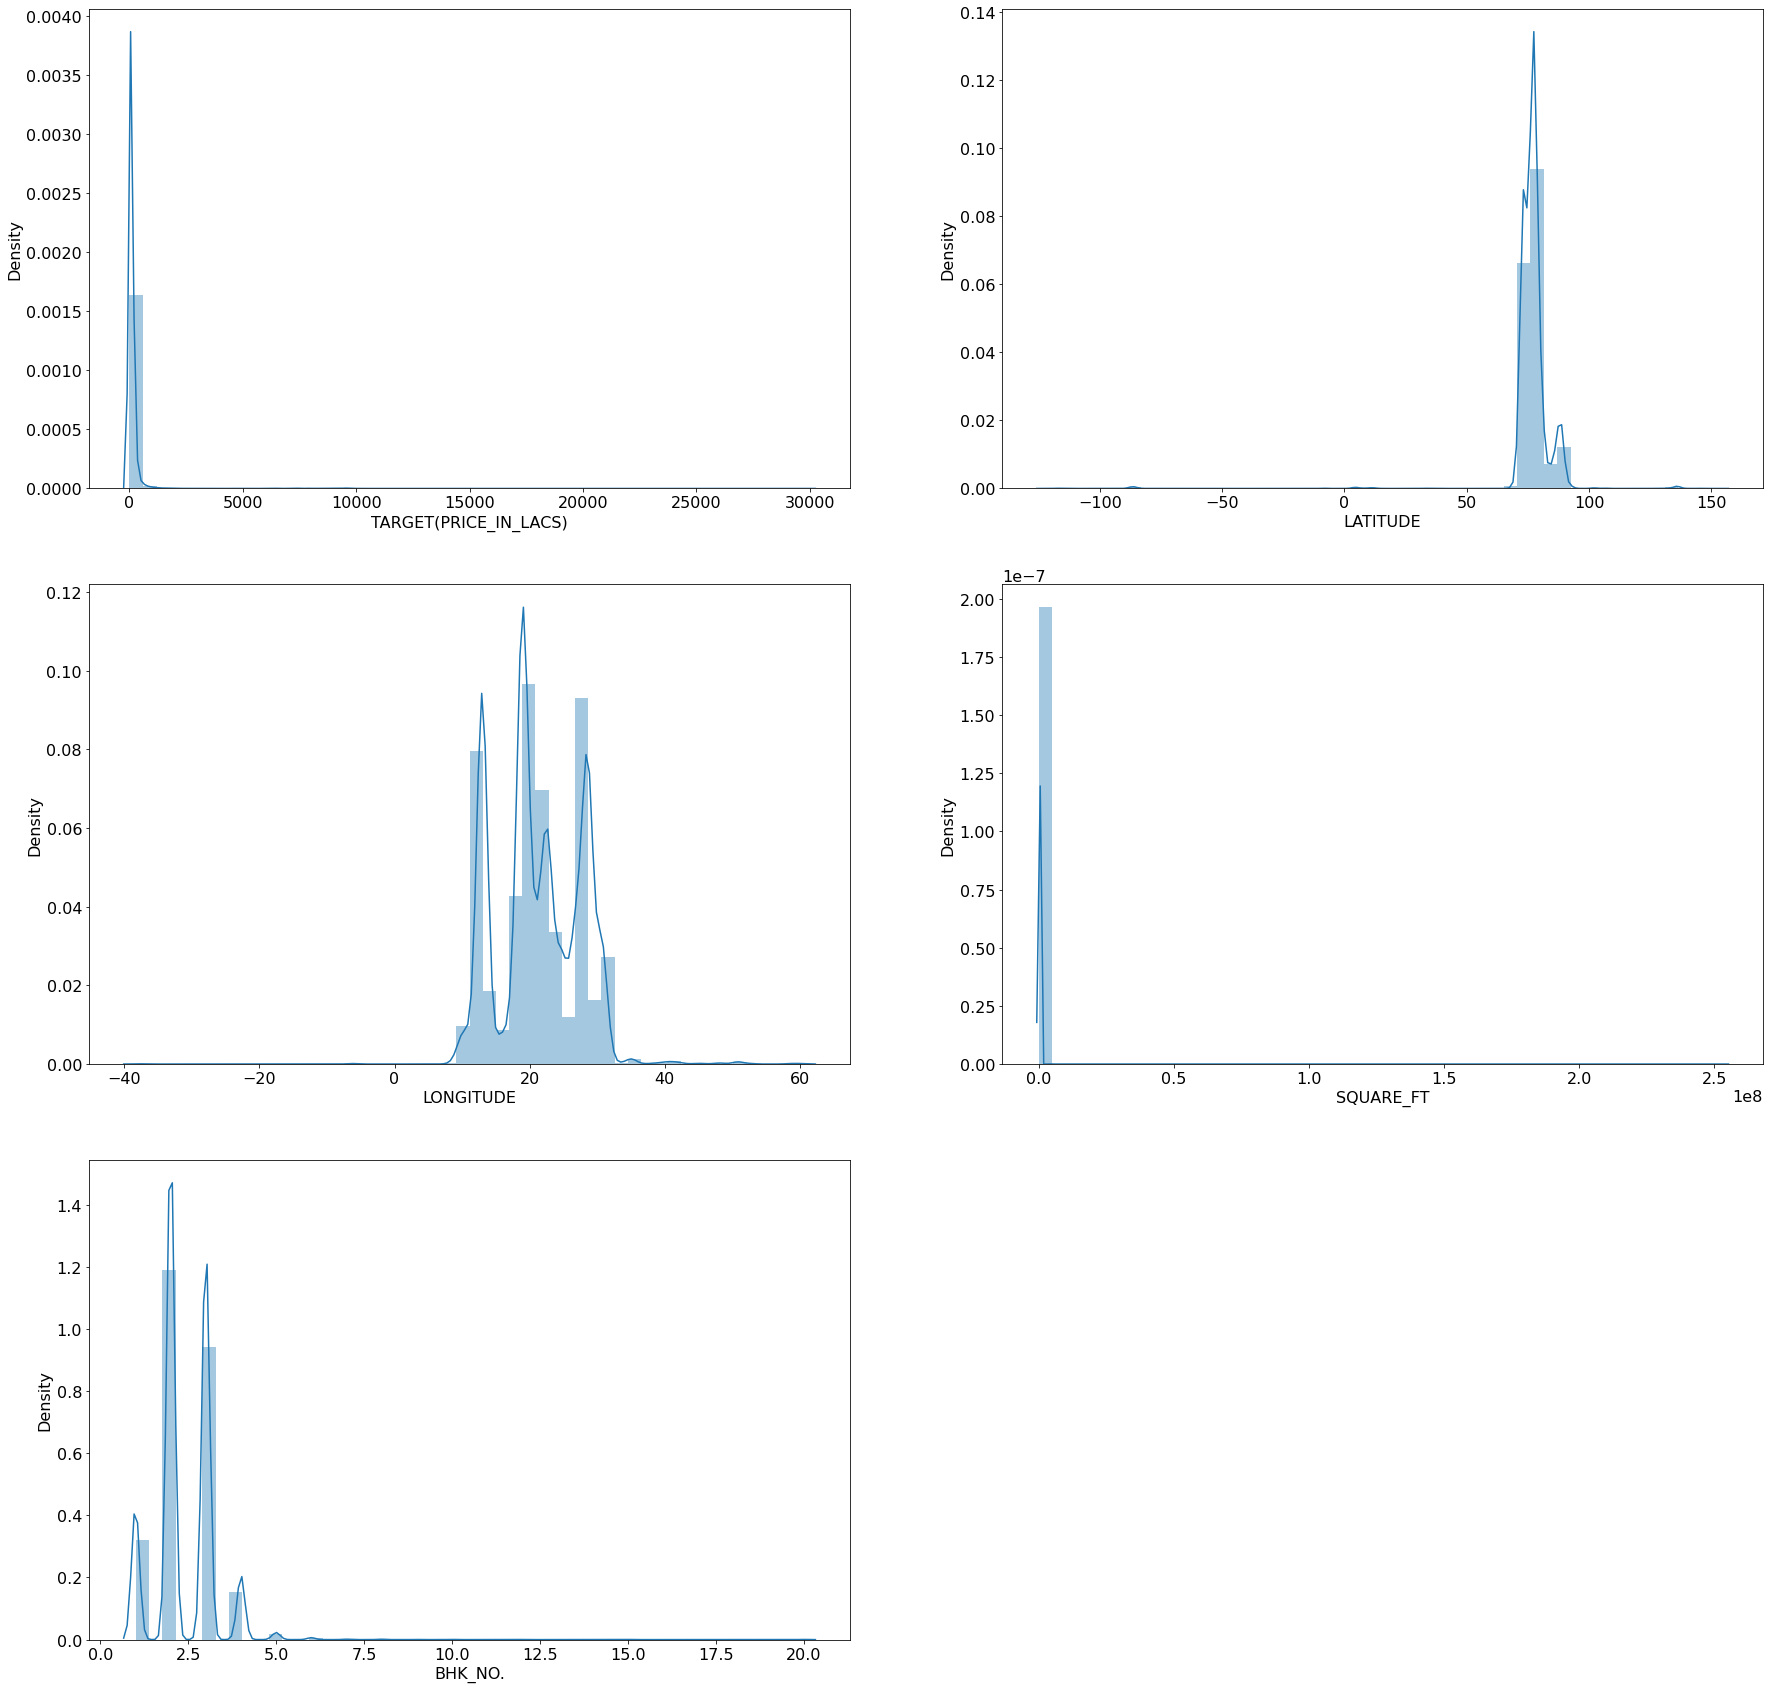

In [11]:
i = 1
plt.figure(figsize=(30,30))
for col in numerical_features:
    plt.subplot(3,2,i)
    i = i + 1
    ax = sns.distplot(df[col])
    ax.set_xlabel(col)

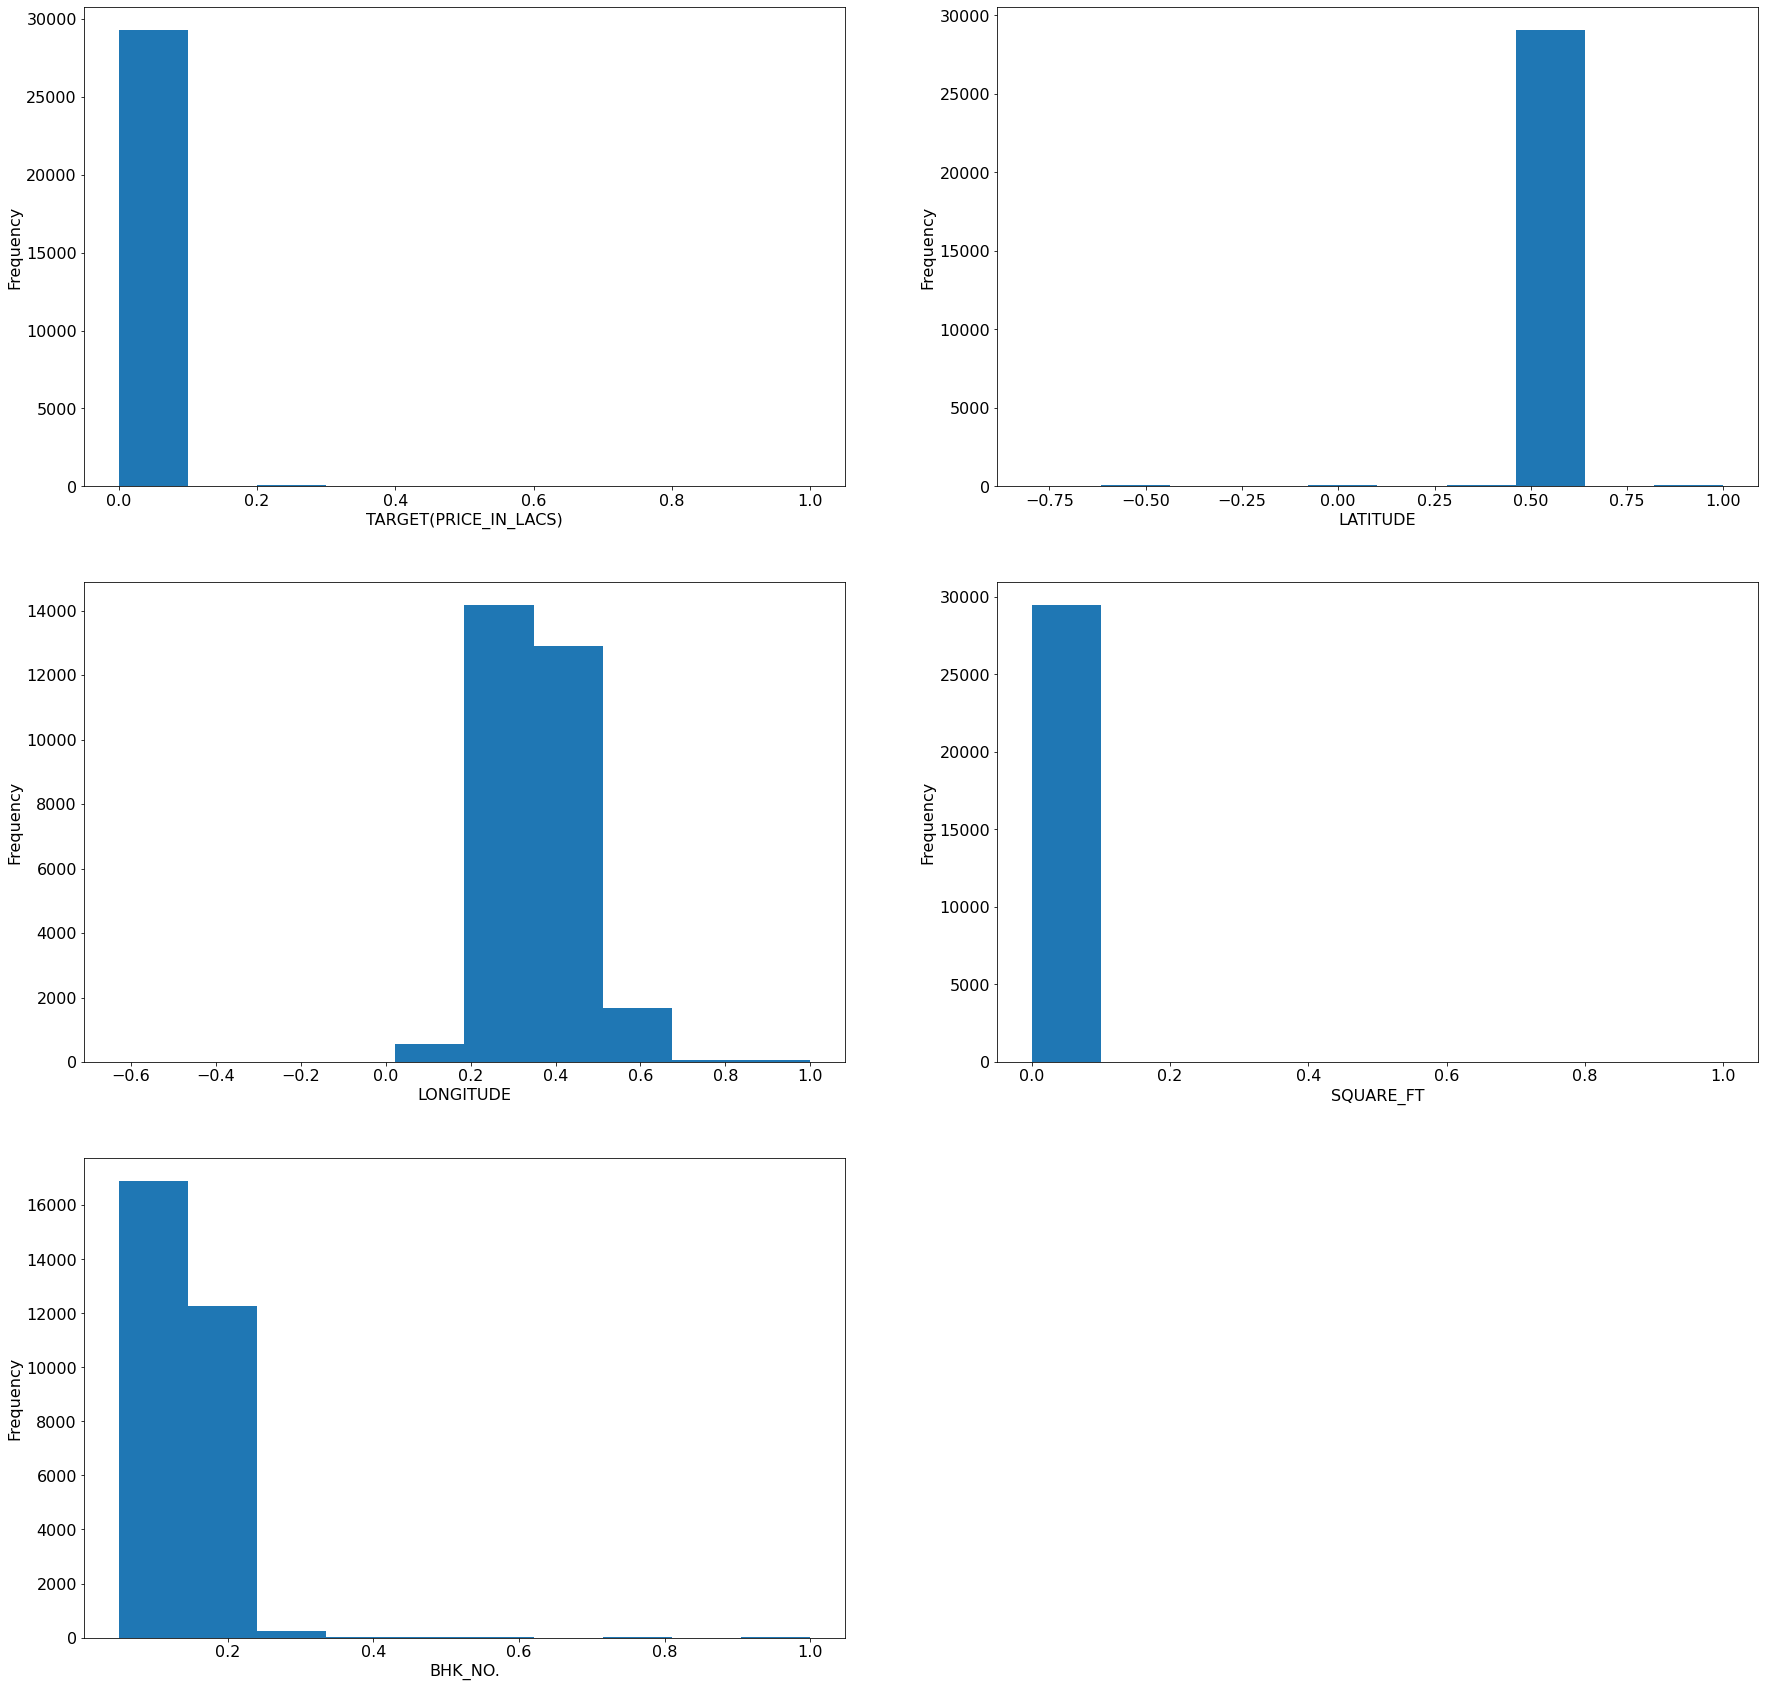

In [12]:
i = 1
plt.figure(figsize=(30,30))
for col in numerical_features:
    plt.subplot(3,2,i)
    i = i + 1
    ax = (df[col]/df[col].max()).plot.hist()
    ax.set_xlabel(col)

In [13]:
df_numerical = df[numerical_features]
df_numerical.head()

,TARGET(PRICE_IN_LACS),LATITUDE,LONGITUDE,SQUARE_FT,BHK_NO.
0,55.0,77.597960,12.969910,1300.236407,2
1,51.0,76.644605,12.274538,1275.000000,2
2,43.0,77.632191,12.778033,933.159722,2
3,62.5,77.344500,28.642300,929.921143,2
4,60.5,88.484911,22.592200,999.009247,2


In [14]:
df_numerical.corr()

,TARGET(PRICE_IN_LACS),LATITUDE,LONGITUDE,SQUARE_FT,BHK_NO.
TARGET(PRICE_IN_LACS),1.000000,-0.017254,-0.031112,0.402685,0.112283
LATITUDE,-0.017254,1.000000,-0.155062,0.000803,0.046930
LONGITUDE,-0.031112,-0.155062,1.000000,-0.012591,0.068730
SQUARE_FT,0.402685,0.000803,-0.012591,1.000000,0.005303
BHK_NO.,0.112283,0.046930,0.068730,0.005303,1.000000


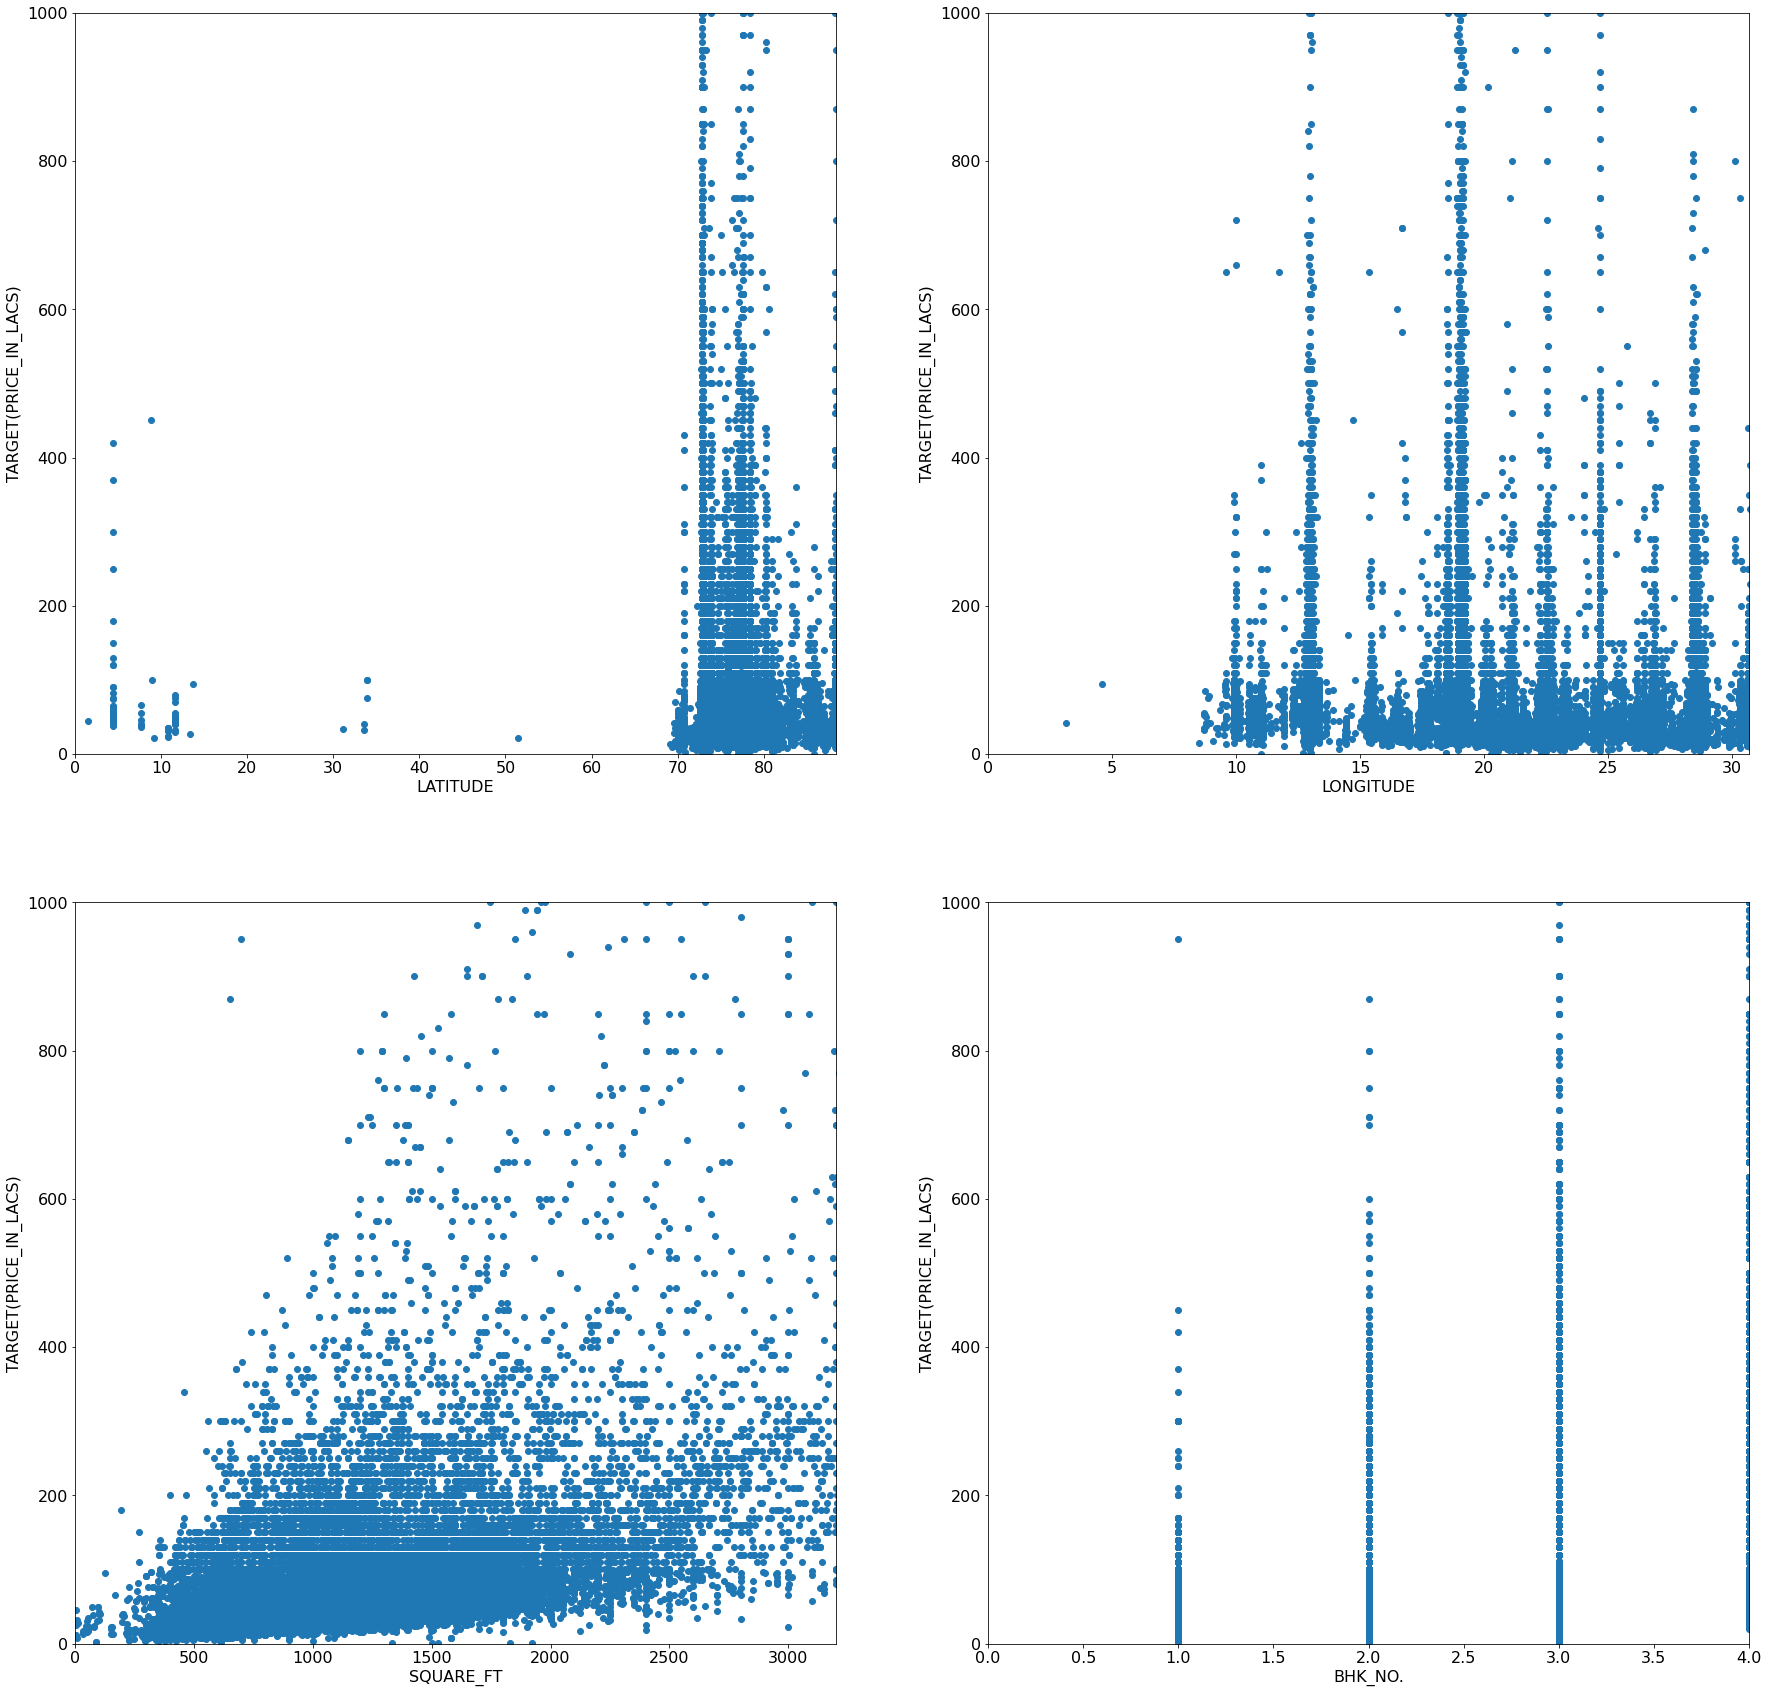

In [15]:
i = 1
plt.figure(figsize=(30,30))
for col in numerical_features:
    if(col!='TARGET(PRICE_IN_LACS)'):
        plt.subplot(2,2,i)
        i = i + 1
        plt.scatter(df[col],df['TARGET(PRICE_IN_LACS)'])
        plt.ylabel('TARGET(PRICE_IN_LACS)')
        plt.ylim([0,1000])
        plt.xlim([0,df[col].quantile(0.97)])
        plt.xlabel(col)

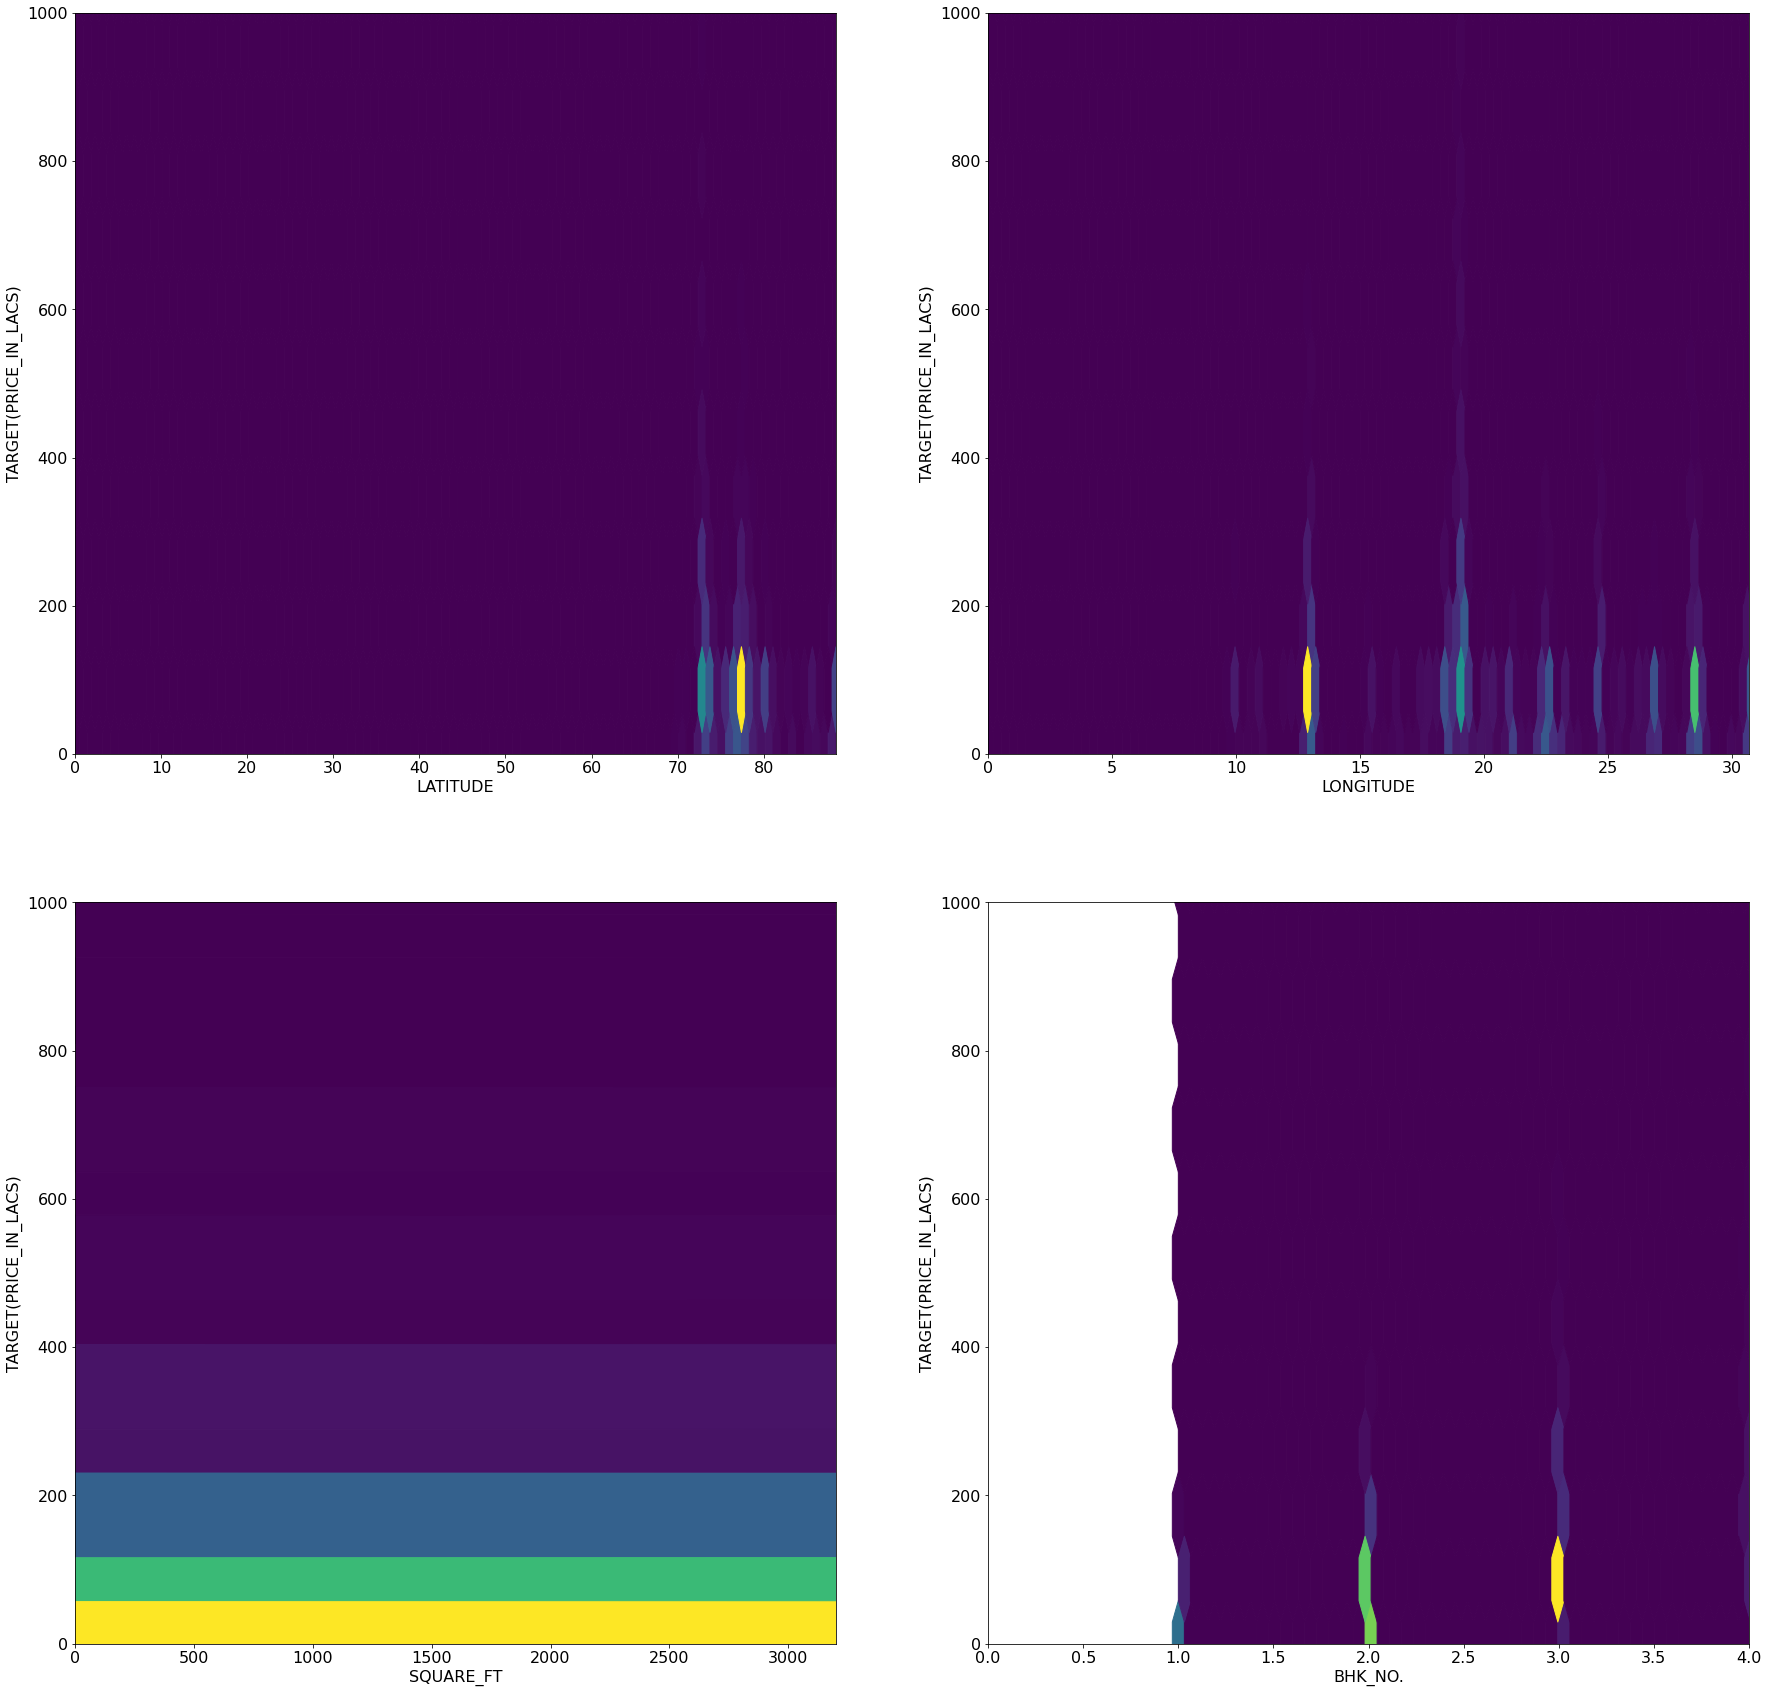

In [16]:
i = 1
plt.figure(figsize=(30,30))
for col in numerical_features:
    if(col!='TARGET(PRICE_IN_LACS)'):
        plt.subplot(2,2,i)
        i = i + 1
        plt.hexbin(df[col],df['TARGET(PRICE_IN_LACS)'],gridsize = 300)
        plt.ylabel('TARGET(PRICE_IN_LACS)')
        plt.ylim([0,1000])
        plt.xlim([0,df[col].quantile(0.97)])
        plt.xlabel(col)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


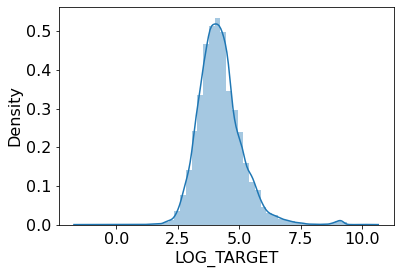

In [17]:
df['LOG_TARGET'] = np.log(df['TARGET(PRICE_IN_LACS)'])
sns.distplot(df['LOG_TARGET'])
numerical_features.append('LOG_TARGET')
df_numerical = df[numerical_features]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


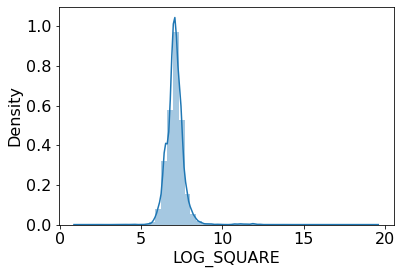

In [18]:
df['LOG_SQUARE'] = np.log(df['SQUARE_FT'])
sns.distplot(df['LOG_SQUARE'])
numerical_features.append('LOG_SQUARE')
df_numerical = df[numerical_features]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


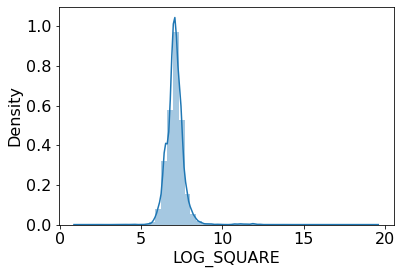

In [19]:
df['LOG_SQUARE'] = np.log(df['SQUARE_FT'])
sns.distplot(df['LOG_SQUARE'])
numerical_features.append('LOG_SQUARE')
df_numerical = df[numerical_features]

In [20]:
df_numerical.corr()

,TARGET(PRICE_IN_LACS),LATITUDE,LONGITUDE,SQUARE_FT,BHK_NO.,LOG_TARGET,LOG_SQUARE,LOG_SQUARE
TARGET(PRICE_IN_LACS),1.000000,-0.017254,-0.031112,0.402685,0.112283,0.511420,0.596287,0.596287
LATITUDE,-0.017254,1.000000,-0.155062,0.000803,0.046930,-0.062362,0.021679,0.021679
LONGITUDE,-0.031112,-0.155062,1.000000,-0.012591,0.068730,-0.128747,0.034685,0.034685
SQUARE_FT,0.402685,0.000803,-0.012591,1.000000,0.005303,0.064136,0.192284,0.192284
BHK_NO.,0.112283,0.046930,0.068730,0.005303,1.000000,0.479781,0.635224,0.635224
LOG_TARGET,0.511420,-0.062362,-0.128747,0.064136,0.479781,1.000000,0.633204,0.633204
LOG_SQUARE,0.596287,0.021679,0.034685,0.192284,0.635224,0.633204,1.000000,1.000000
LOG_SQUARE,0.596287,0.021679,0.034685,0.192284,0.635224,0.633204,1.000000,1.000000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


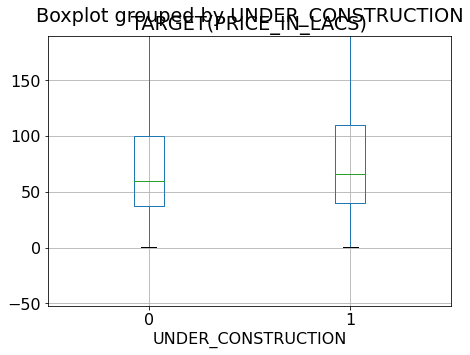

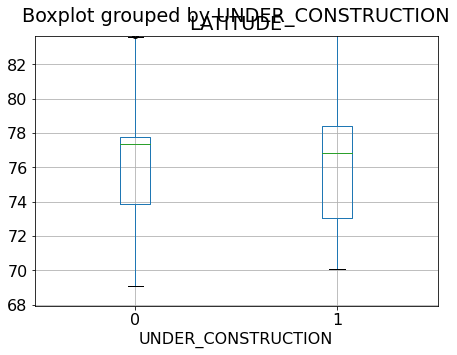

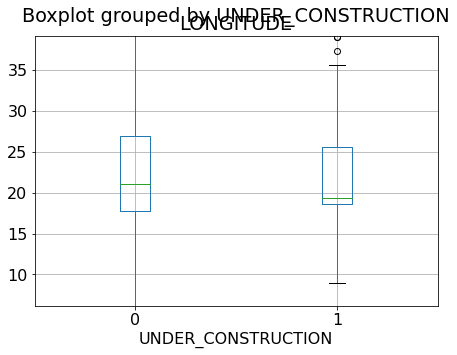

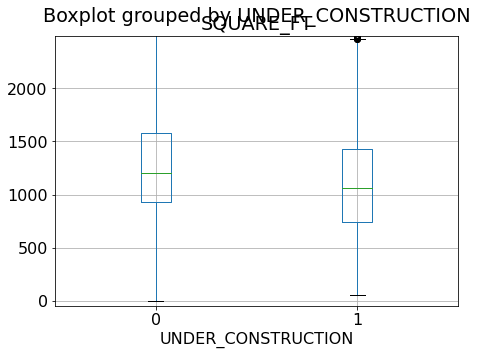

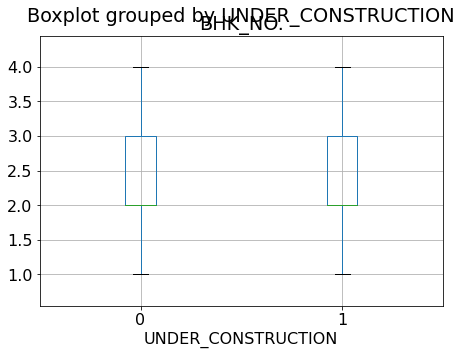

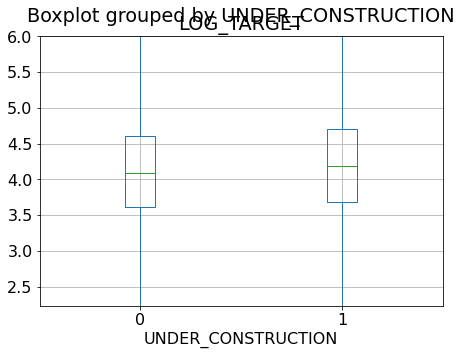

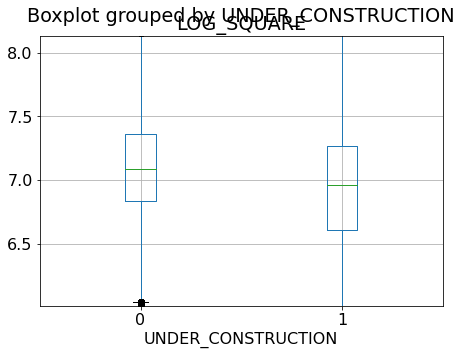

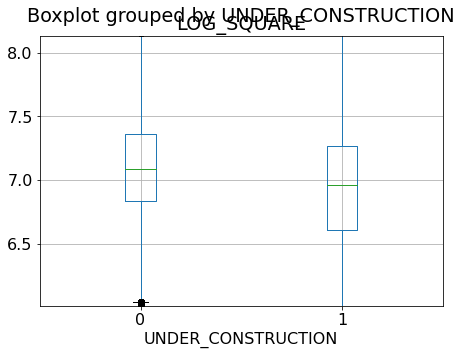

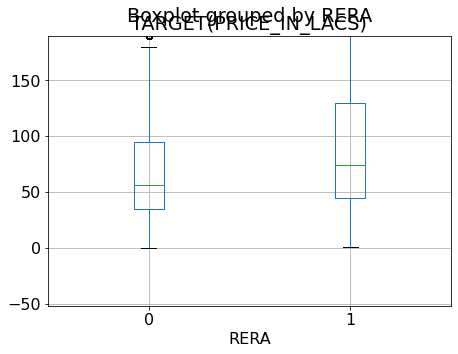

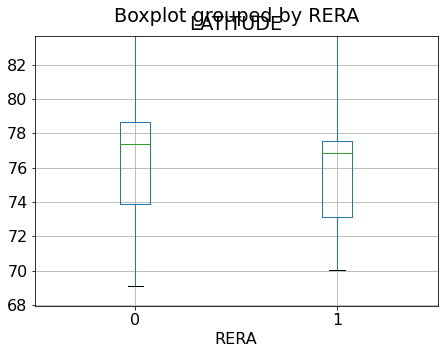

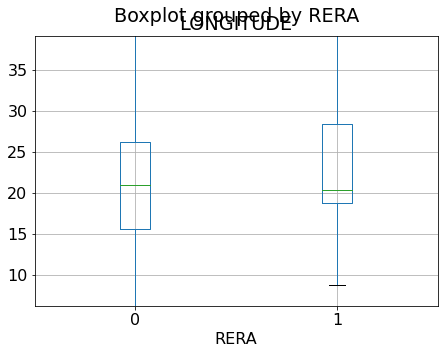

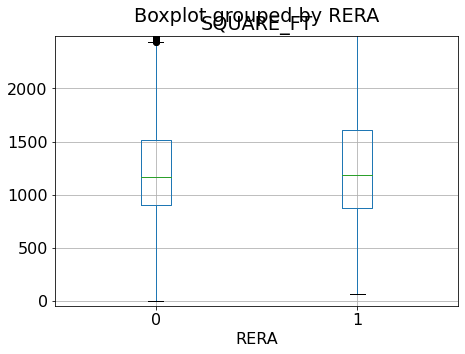

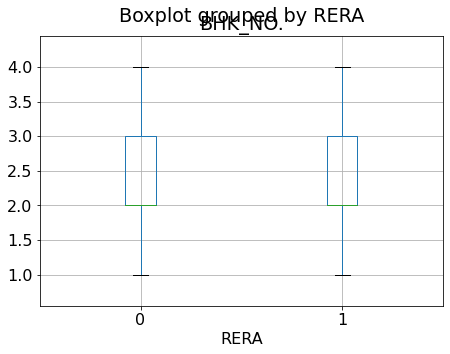

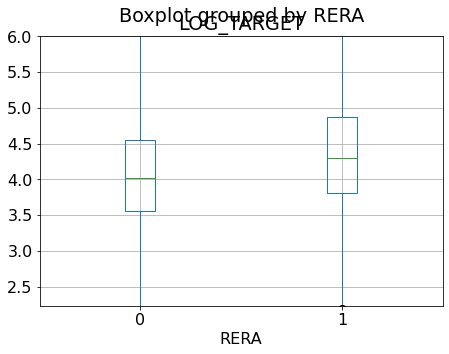

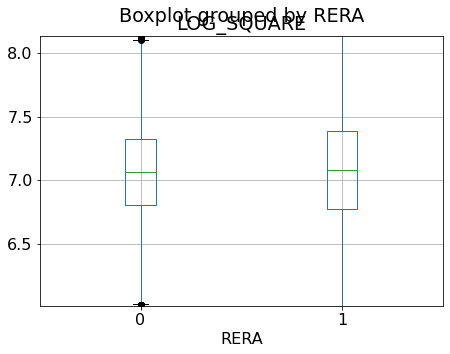

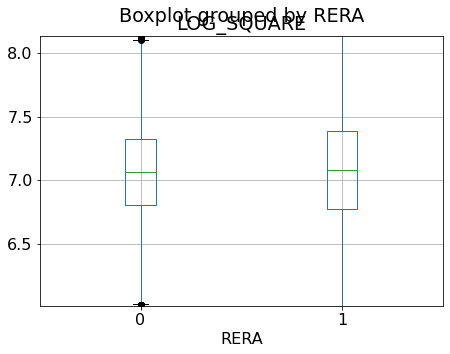

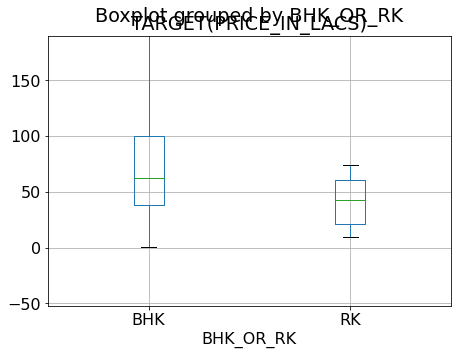

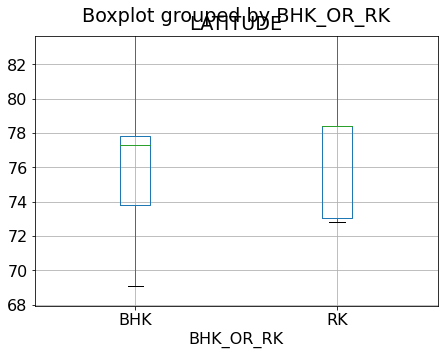

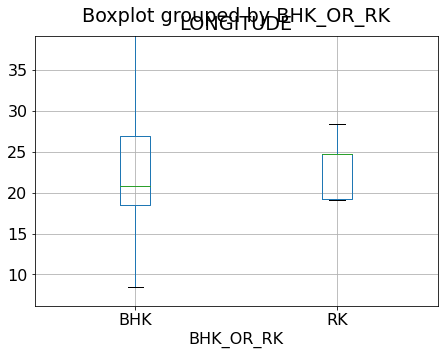

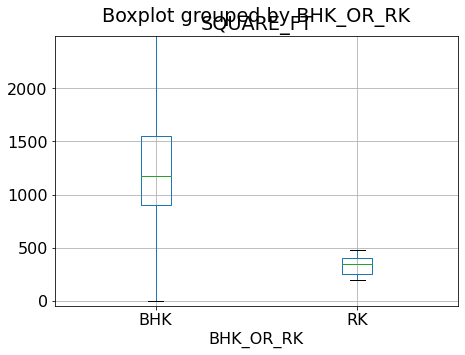

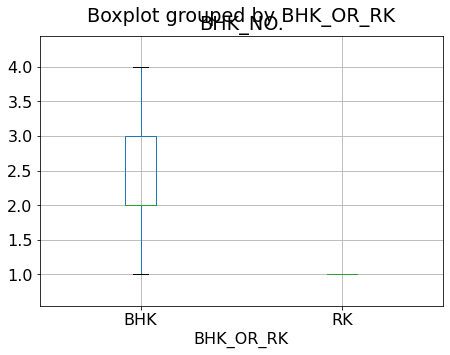

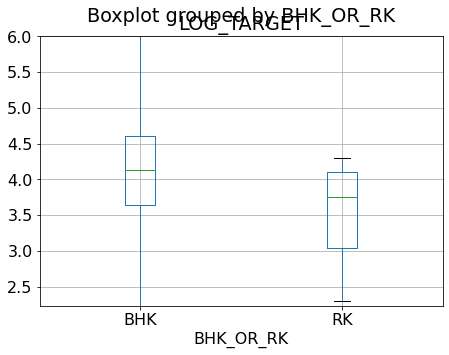

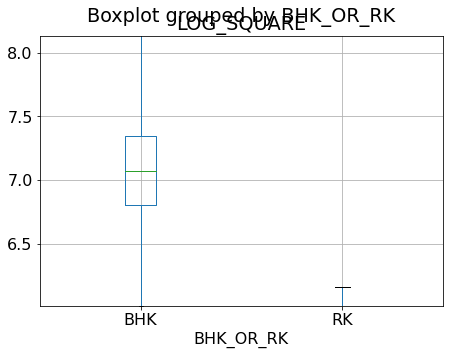

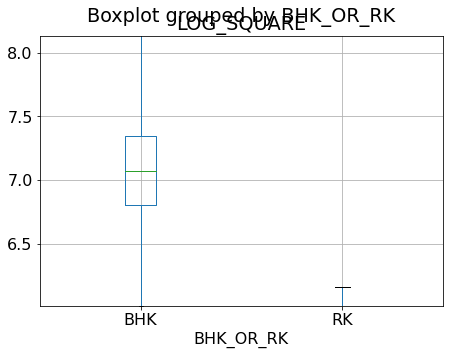

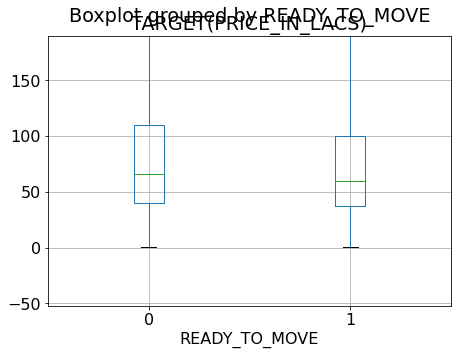

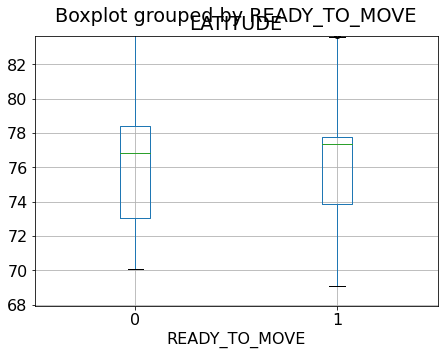

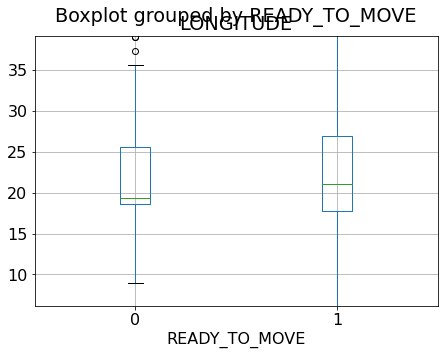

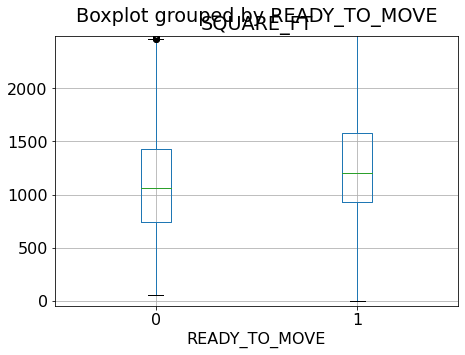

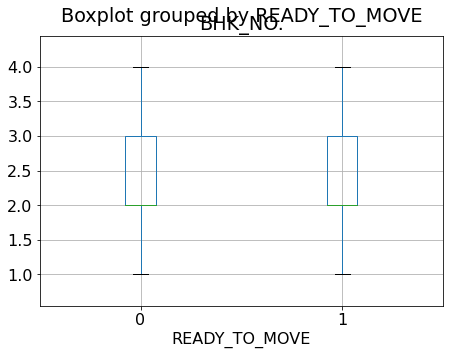

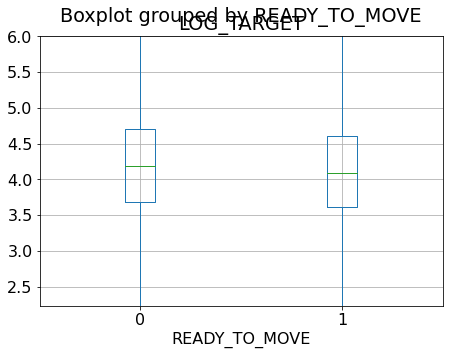

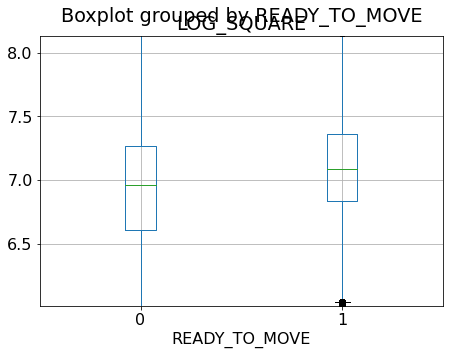

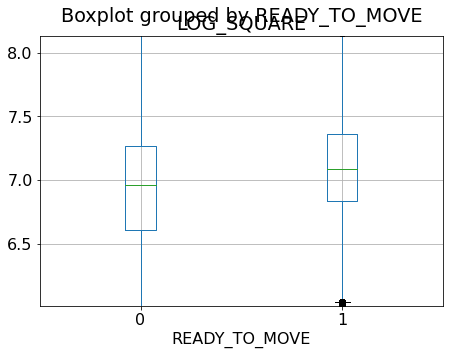

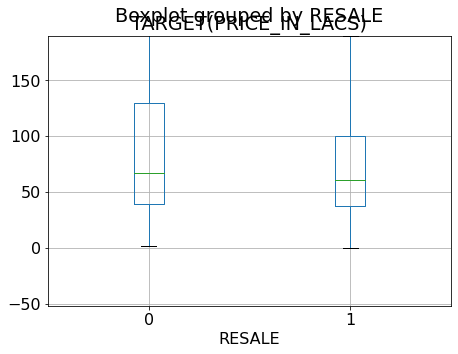

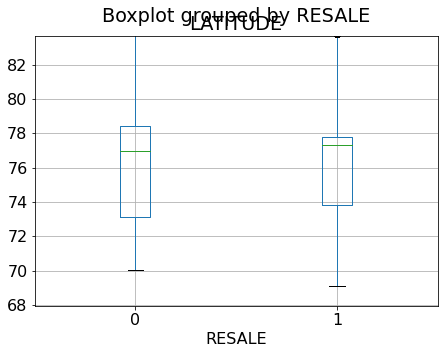

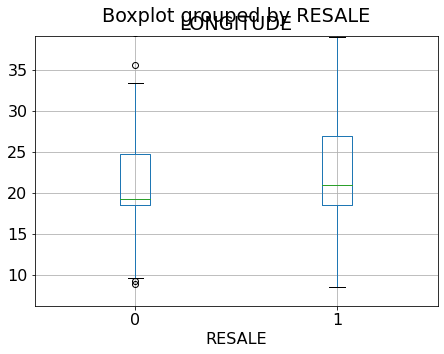

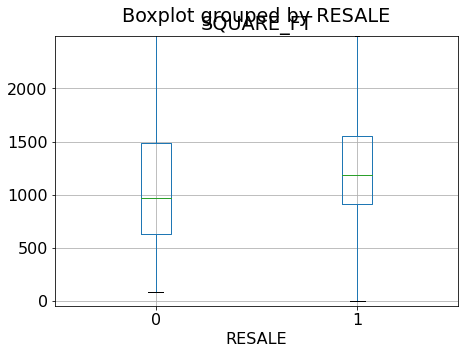

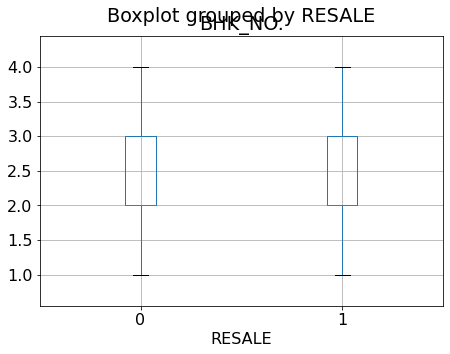

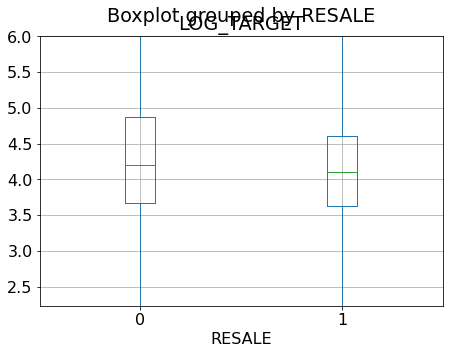

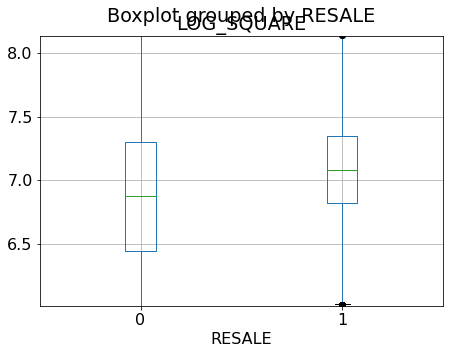

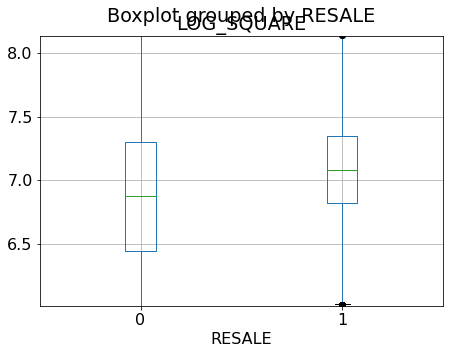

In [21]:
i = 1
for category in categorical_features:
    for numeric in numerical_features:
        ax = df.boxplot(by = category,column=numeric,figsize=(7,5))
        IQR = (df[numeric].quantile(0.75)-df[numeric].quantile(0.25))
        ax.set_ylim([df[numeric].quantile(0.25)-1.45*IQR,df[numeric].quantile(0.75)+1.45*IQR])
        

**Statistics for Categorical Variable**

1.) Contigency Table

In [22]:
for i in range(len(categorical_features)):
    for j in range(i+1,len(categorical_features)):
        print(pd.pivot_table(data = df,index=categorical_features[i],columns=categorical_features[j],aggfunc=lambda x: len(x),margins = True)['ADDRESS'])

RERA                    0     1    All
UNDER_CONSTRUCTION                    
0                   18393  5764  24157
1                    1695  3599   5294
All                 20088  9363  29451
BHK_OR_RK             BHK  RK    All
UNDER_CONSTRUCTION                  
0                   24144  13  24157
1                    5283  11   5294
All                 29427  24  29451
READY_TO_MOVE            0        1    All
UNDER_CONSTRUCTION                        
0                      NaN  24157.0  24157
1                   5294.0      NaN   5294
All                 5294.0  24157.0  29451
RESALE                 0      1    All
UNDER_CONSTRUCTION                    
0                    696  23461  24157
1                   1378   3916   5294
All                 2074  27377  29451
BHK_OR_RK    BHK  RK    All
RERA                       
0          20074  14  20088
1           9353  10   9363
All        29427  24  29451
READY_TO_MOVE     0      1    All
RERA                             
0 

2.) Bar Chart

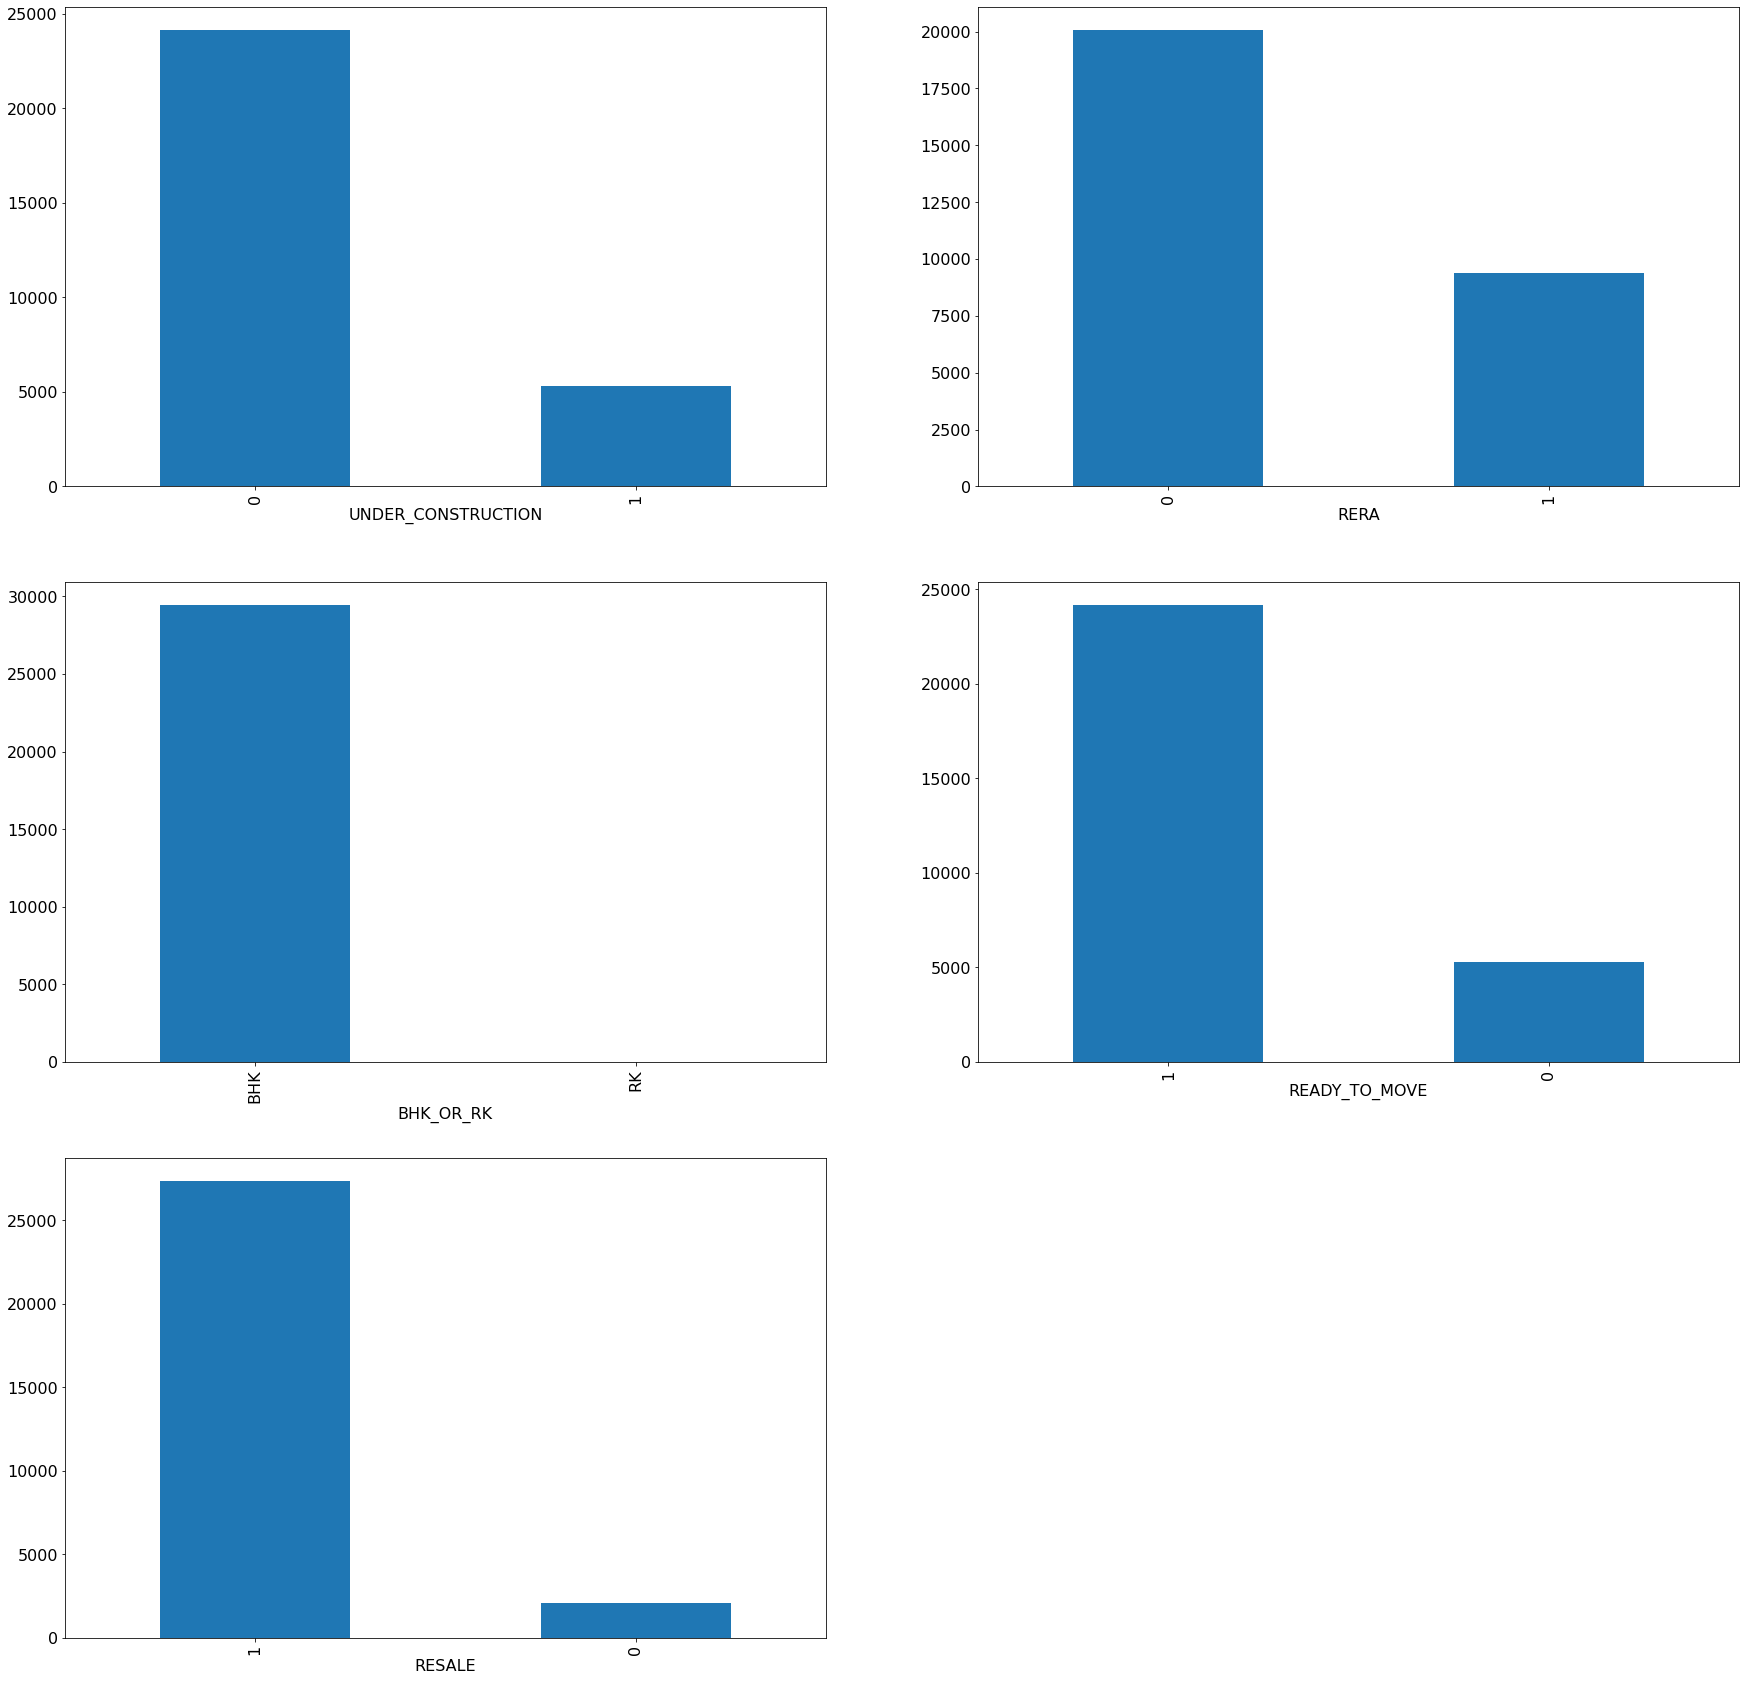

In [23]:
categorical_cols = ['UNDER_CONSTRUCTION','RERA','BHK_OR_RK','READY_TO_MOVE','RESALE']
i = 1
plt.rcParams['font.size'] = 16
plt.figure(figsize = (30,30))
for col in categorical_cols:
    table = df[col].value_counts()
    plt.subplot(3,2,i)
    i = i + 1
    ax = table.plot.bar()
    ax.set_xlabel(col)

In [24]:
df['BHK_OR_RK'].replace(['BHK','RK'],[0,1],inplace = True)

In [25]:
df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LOG_TARGET,LOG_SQUARE
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,0.020719,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399,0.048006,-0.062158
RERA,0.363826,1.000000,0.009547,0.006056,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636,0.142964,0.025315
BHK_NO.,-0.040712,0.009547,1.000000,-0.045231,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283,0.479781,0.635224
BHK_OR_RK,0.020719,0.006056,-0.045231,1.000000,-0.000292,-0.020719,-0.029346,0.009095,0.000303,-0.004429,-0.021938,-0.062918
SQUARE_FT,-0.004204,-0.006229,0.005303,-0.000292,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685,0.064136,0.192284
READY_TO_MOVE,-1.000000,-0.363826,0.040712,-0.020719,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399,-0.048006,0.062158
RESALE,-0.347405,-0.270351,0.014581,-0.029346,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378,-0.094225,-0.022976
LONGITUDE,0.006440,0.104976,0.068730,0.009095,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112,-0.128747,0.034685
LATITUDE,-0.000381,-0.065106,0.046930,0.000303,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254,-0.062362,0.021679
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,-0.004429,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000,0.511420,0.596287


In [26]:
#df2 = df[['LOG_TARGET','LOG_SQUARE','BHK_NO.']]
df2 = df.drop(columns=['ADDRESS','POSTED_BY','TARGET(PRICE_IN_LACS)','SQUARE_FT'])
df2.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'LOG_TARGET', 'LOG_SQUARE'],
      dtype='object')

In [27]:
from sklearn.linear_model import LinearRegression
x = np.array(df2.drop(columns = ['LOG_TARGET']))
y = np.array(df2['LOG_TARGET'])
y = y.reshape((y.shape[0],1))
print(x.shape,y.shape)

(29451, 9) (29451, 1)


In [28]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
ss = StandardScaler()
x1 = ss.fit_transform(x)
pr = PolynomialFeatures(degree=2)
x2 = pr.fit_transform(x1)
print(x2.shape)
x_train,x_test,y_train,y_test = tts(x2,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

(29451, 55)
0.5160317771483817
0.45196773275324287


In [29]:
x_train1,x_test1,y_train1,y_test1 = tts(x1,y,test_size=0.2,random_state=10)
from sklearn.ensemble import RandomForestRegressor
dtr = RandomForestRegressor(max_depth=15)
dtr.fit(x_train1,y_train1)
print(dtr.score(x_train1,y_train1))
print(dtr.score(x_test1,y_test1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9435872756049859
0.8177630042595607


In [30]:
df_test = pd.read_csv('/kaggle/input/house-price-prediction-challenge/test.csv')
df_test.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [31]:
df_test['BHK_OR_RK'].replace(['BHK','RK'],[0,1],inplace = True)
df_test['LOG_SQUARE'] = np.log(df_test['SQUARE_FT'])
df_test2 = df_test[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE','RESALE', 'LONGITUDE', 'LATITUDE', 'LOG_SQUARE']]
df_test2.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'LOG_SQUARE'],
      dtype='object')

In [32]:
x_submit = np.array(df_test2)
y_submit = dtr.predict(x_submit)
print(y_submit.shape)

(68720,)


In [33]:
df_submit = pd.read_csv('/kaggle/input/house-price-prediction-challenge/sample_submission.csv')
df_submit.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [34]:
y_submit = np.exp(y_submit)
df_my_submit = pd.DataFrame(y_submit,columns=['TARGET(PRICE_IN_LACS)'])
df_my_submit.to_csv('Submission.csv')